# Part 2

## 1. The Data

## 2. Data Prepraration

In [1]:
# read data
import pandas as pd
df1 = pd.read_csv('./sentiment labelled sentences/sentiment labelled sentences/amazon_cells_labelled.txt', sep="\t", header=None)
df2 = pd.read_csv('./sentiment labelled sentences/sentiment labelled sentences/imdb_labelled.txt', sep="\t", header=None)
df3 = pd.read_csv('./sentiment labelled sentences/sentiment labelled sentences/yelp_labelled.txt', sep="\t", header=None)
df1.columns = ["sentence", "score"]
df2.columns = ["sentence", "score"]
df3.columns = ["sentence", "score"]

In [2]:
print(df1[:2])

                                            sentence  score
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1


In [3]:
print(df2[:2])

                                            sentence  score
0  A very, very, very slow-moving, aimless movie ...      0
1  Not sure who was more lost - the flat characte...      0


In [4]:
print(df3[:2])

                   sentence  score
0  Wow... Loved this place.      1
1        Crust is not good.      0


In [5]:
print

<function print>

## 3. Data Transformation

In [6]:
df = pd.concat([df1, df2,df3],ignore_index=True)  # combine three data set into one dataframe
for i in df['sentence'][:3]:
    
    print(i)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


In [7]:
df[:-10]

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2733,The problem I have is that they charge $11.99 ...,0
2734,Shrimp- When I unwrapped it (I live only 1/2 a...,0
2735,"It lacked flavor, seemed undercooked, and dry.",0
2736,It really is impressive that the place hasn't ...,0


In [8]:
df.iloc[::10,0:2][0:10]

,sentence,score
0,So there is no way for me to plug it in here i...,0
10,And the sound quality is great.,1
20,I went on Motorola's website and followed all ...,0
30,"This is a simple little phone to use, but the ...",0
40,"It has a great camera thats 2MP, and the pics ...",1
50,Not loud enough and doesn't turn on like it sh...,0
60,Essentially you can forget Microsoft's tech su...,0
70,Mic Doesn't work.,0
80,I wear it everyday and it holds up very well.,1
90,For a product that costs as much as this one d...,0


In [9]:
df.loc[::10,'sentence'][0:10]

0     So there is no way for me to plug it in here i...
10                      And the sound quality is great.
20    I went on Motorola's website and followed all ...
30    This is a simple little phone to use, but the ...
40    It has a great camera thats 2MP, and the pics ...
50    Not loud enough and doesn't turn on like it sh...
60    Essentially you can forget Microsoft's tech su...
70                                    Mic Doesn't work.
80        I wear it everyday and it holds up very well.
90    For a product that costs as much as this one d...
Name: sentence, dtype: object

In [10]:
df[::10][0:10]

,sentence,score
0,So there is no way for me to plug it in here i...,0
10,And the sound quality is great.,1
20,I went on Motorola's website and followed all ...,0
30,"This is a simple little phone to use, but the ...",0
40,"It has a great camera thats 2MP, and the pics ...",1
50,Not loud enough and doesn't turn on like it sh...,0
60,Essentially you can forget Microsoft's tech su...,0
70,Mic Doesn't work.,0
80,I wear it everyday and it holds up very well.,1
90,For a product that costs as much as this one d...,0


## 4. Data Mining using Pandas

In [11]:
df.isnull()

,sentence,score
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
2743,False,False
2744,False,False
2745,False,False
2746,False,False


In [12]:
import helpers.data_mining_helpers as dmh
df.isnull().apply(lambda x:dmh.check_missing_values(x))

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [13]:
dummy_series = pd.Series(["dummy_record"], index=["sentence"])

In [14]:
dummy_series

sentence    dummy_record
dtype: object

In [15]:
result_with_series = df.append(dummy_series,ignore_index=True)

In [16]:
len(result_with_series)

2749

In [17]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,1


In [18]:
dummy_dict=[{'sentence':'dummy_record'}]

In [19]:
X = df.append(dummy_dict,ignore_index=True)

In [20]:
len(X)

2749

In [21]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,1


In [22]:
X.dropna(inplace=True)

In [23]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [24]:
len(X)

2748

## 4.2 Dealing with Duplicate Data

In [25]:
X.duplicated()  # check each row is duplicated or %notebook

0       False
1       False
2       False
3       False
4       False
        ...  
2743    False
2744    False
2745    False
2746    False
2747    False
Length: 2748, dtype: bool

In [26]:
sum(X.duplicated())  # calculate the amount of duplicates

17

In [27]:
sum(X.duplicated('sentence'))

17

In [28]:
X.drop_duplicates(keep=False, inplace = True)

In [29]:
len(X)

2714

## 5 Data Preprocessing

In [30]:
X_sample = X.sample(n=1000)  # random select 1000 samples

In [31]:
len(X_sample)

1000

In [32]:
X_sample[0:4]

,sentence,score
2167,"Our server was very nice, and even though he l...",1.0
988,"It didn't work, people can not hear me when I ...",0.0
1960,My friend loved the salmon tartar.,1.0
824,Awkward to use and unreliable.,0.0


In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

1.0    1366
0.0    1348
Name: score, dtype: int64


<AxesSubplot:title={'center':'score'}>

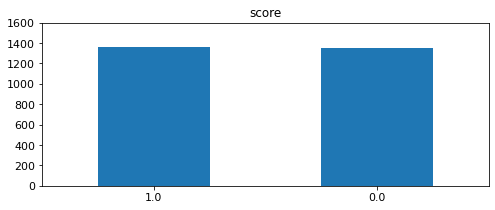

In [34]:
print(X.score.value_counts())  # print the data`s distribution

#plot barchart for X
X.score.value_counts().plot(kind = 'bar',
                                    title = 'score',
                                    ylim = [0, 1600],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

1.0    507
0.0    493
Name: score, dtype: int64


<AxesSubplot:title={'center':'score'}>

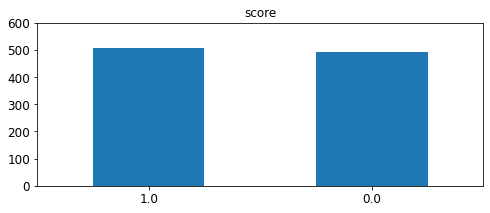

In [35]:
print(X_sample.score.value_counts())  # print the random-selected data`s distribution

#plot barchart for X_sample
X_sample.score.value_counts().plot(kind = 'bar',
                                           title = 'score',
                                           ylim = [0, 600], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

## 5.2 Feature Creation

In [36]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\selab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
# takes a like a minute or two to process
X['unigrams'] = X['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [38]:
X[0:4]["unigrams"]    # show senetence chopped into words

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [39]:
X[0:4]

,sentence,score,unigrams
0,So there is no way for me to plug it in here i...,0.0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1.0,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1.0,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0.0,"[Tied, to, charger, for, conversations, lastin..."


In [40]:
list(X[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

## 5.3 Feature subset selection

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_features=50)
X_counts = count_vect.fit_transform(X.sentence)

In [42]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")
#" ".join(list(X[4:5].text))

['hello', 'world']

In [43]:
# We can check the shape of this matrix by:
X_counts.shape

(2714, 50)

In [44]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

['all', 'an', 'and', 'are', 'as', 'at', 'bad', 'be', 'but', 'film']

In [45]:
X[0:5]

,sentence,score,unigrams
0,So there is no way for me to plug it in here i...,0.0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1.0,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1.0,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0.0,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1.0,"[The, mic, is, great, .]"


In [46]:
X_counts[0:5,0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]], dtype=int64)

In [47]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]], dtype=int64)

In [48]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]], dtype=int64)

In [49]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:50]]  # top 50 words

In [50]:
plot_x

['term_all',
 'term_an',
 'term_and',
 'term_are',
 'term_as',
 'term_at',
 'term_bad',
 'term_be',
 'term_but',
 'term_film',
 'term_food',
 'term_for',
 'term_from',
 'term_good',
 'term_great',
 'term_had',
 'term_has',
 'term_have',
 'term_if',
 'term_in',
 'term_is',
 'term_it',
 'term_just',
 'term_like',
 'term_movie',
 'term_my',
 'term_not',
 'term_of',
 'term_on',
 'term_one',
 'term_out',
 'term_phone',
 'term_place',
 'term_really',
 'term_service',
 'term_so',
 'term_that',
 'term_the',
 'term_there',
 'term_they',
 'term_this',
 'term_time',
 'term_to',
 'term_very',
 'term_was',
 'term_we',
 'term_well',
 'term_were',
 'term_with',
 'term_you']

In [51]:
plot_y = ["doc_"+str(i) for i in list(X.index)[-20:]]  # last 20 senetences

In [52]:
plot_z = X_counts[-20:, 0:50].toarray()

In [53]:
import seaborn as sns

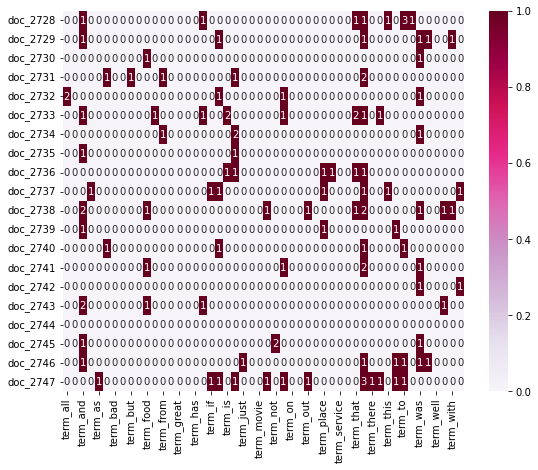

In [54]:
df_todraw = pd.DataFrame(plot_z, columns =plot_x, index =plot_y)
plt.subplots(figsize=(9,7))
ax = sns.heatmap(df_todraw,
                cmap="PuRd",
                vmin=0,vmax=1,annot=True)

## 5.4 Dimensionality Reduction

In [55]:
from sklearn.decomposition import PCA

In [56]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

In [57]:
X_reduced.shape

(2714, 2)

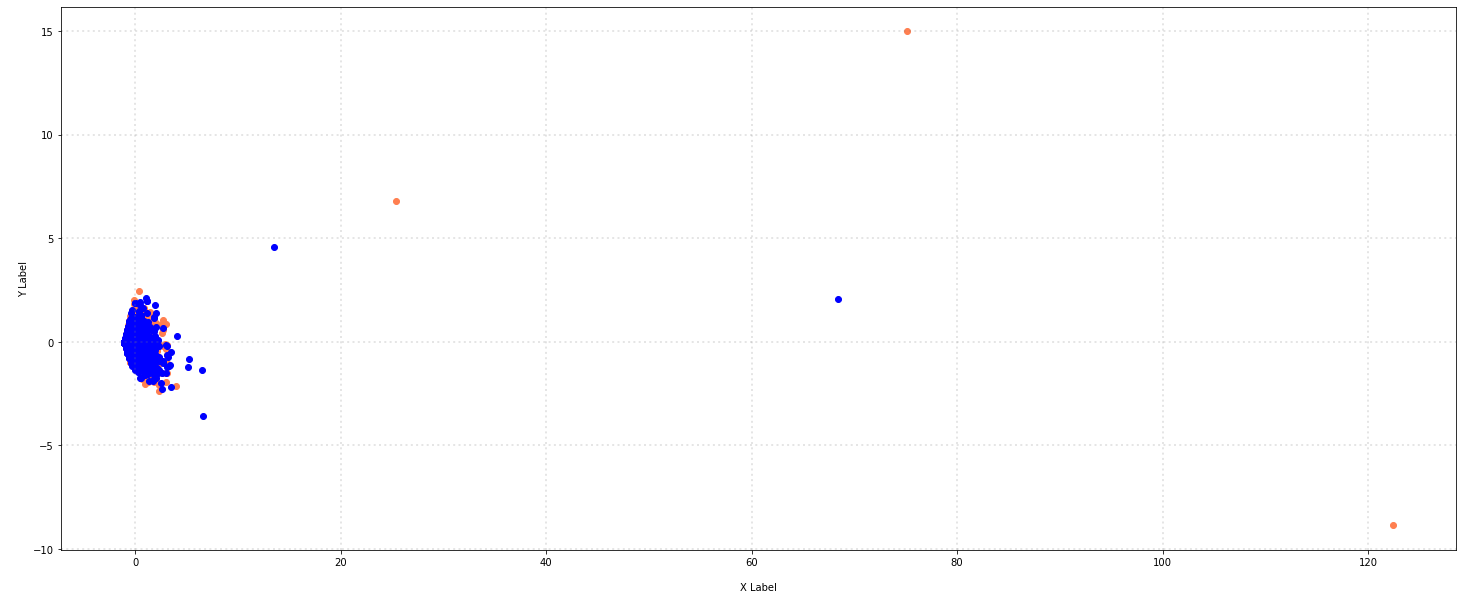

In [58]:
col = ['coral', 'blue', 'black', 'm']
categories = [0.0,1.0]
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['score'] == category].T[0]
    ys = X_reduced[X['score'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

##  5.5 Attribute Transformation / Aggregation

In [59]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [60]:
import numpy as np
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [61]:
term_frequencies[0]

148

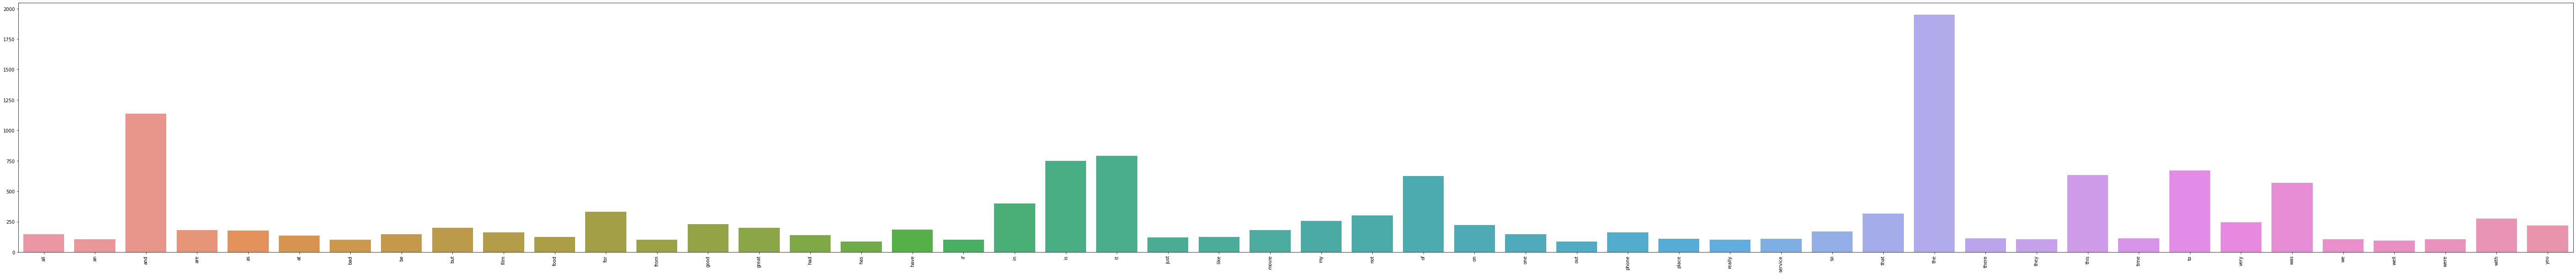

In [62]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [63]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

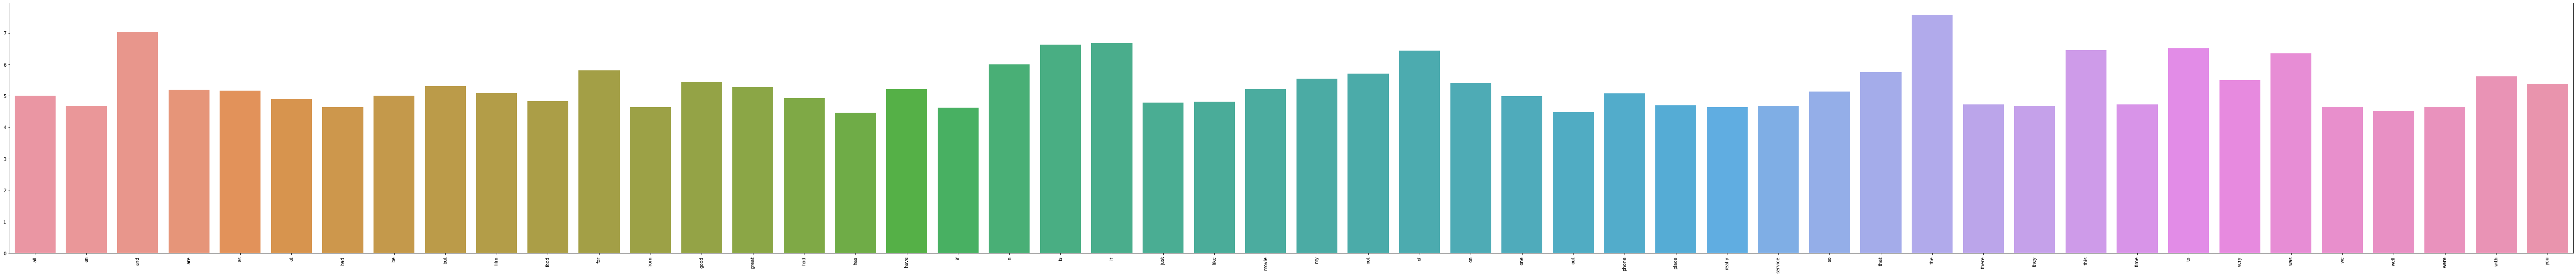

In [64]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

## 5.6 Discretization and Binarization

In [65]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [66]:
## binarized source values to create bin_source column 
mlb = preprocessing.LabelBinarizer()

In [67]:
mlb.fit(X.score)

LabelBinarizer()

In [68]:
mlb.classes_

array([0., 1.])

In [69]:
X['bin_category'] = mlb.transform(X['score']).tolist()

In [70]:
X[0:9]

,sentence,score,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0.0,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1.0,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1.0,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0.0,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1.0,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0.0,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0.0,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1.0,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0.0,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


## 6 Data Exploration

In [71]:
# We retrieve 2 sentences for a random record, here, indexed at 50, 100 and 150
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [72]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [73]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 0 0 0 0 0 0 0 0 0 0 0 1]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0 0 0 0 0 0]]


In [74]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


# Part 3

## 1 New Data Visulization 

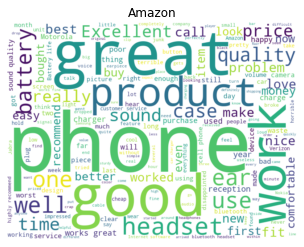

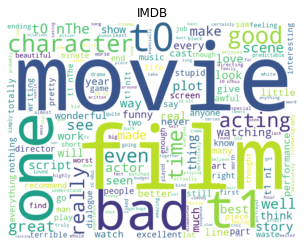

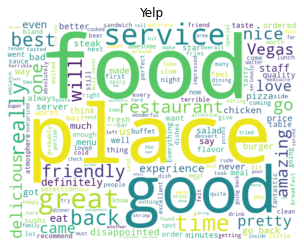

In [75]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS) 

## preprocessing dataframe to string
df1_data = df1.to_string()
df2_data = df2.to_string()
df3_data = df3.to_string()


df1_wordcloud = WordCloud(width=800, height=600, max_words=200, stopwords=stopwords, background_color="white").generate(df1_data)
df2_wordcloud = WordCloud(width=800, height=600, max_words=200, stopwords=stopwords, background_color="white").generate(df2_data)
df3_wordcloud = WordCloud(width=800, height=600, max_words=200, stopwords=stopwords, background_color="white").generate(df3_data)

## plot amazon data
plt.title("Amazon")
plt.axis("off")
plt.imshow(df1_wordcloud, interpolation="bilinear")
plt.show()

## plot imdb data
plt.title("IMDB")
plt.axis("off")
plt.imshow(df2_wordcloud, interpolation="bilinear")
plt.show()

## plot yelp data
plt.title("Yelp")
plt.axis("off")
plt.imshow(df3_wordcloud, interpolation="bilinear")
plt.show()

## TF-IDF

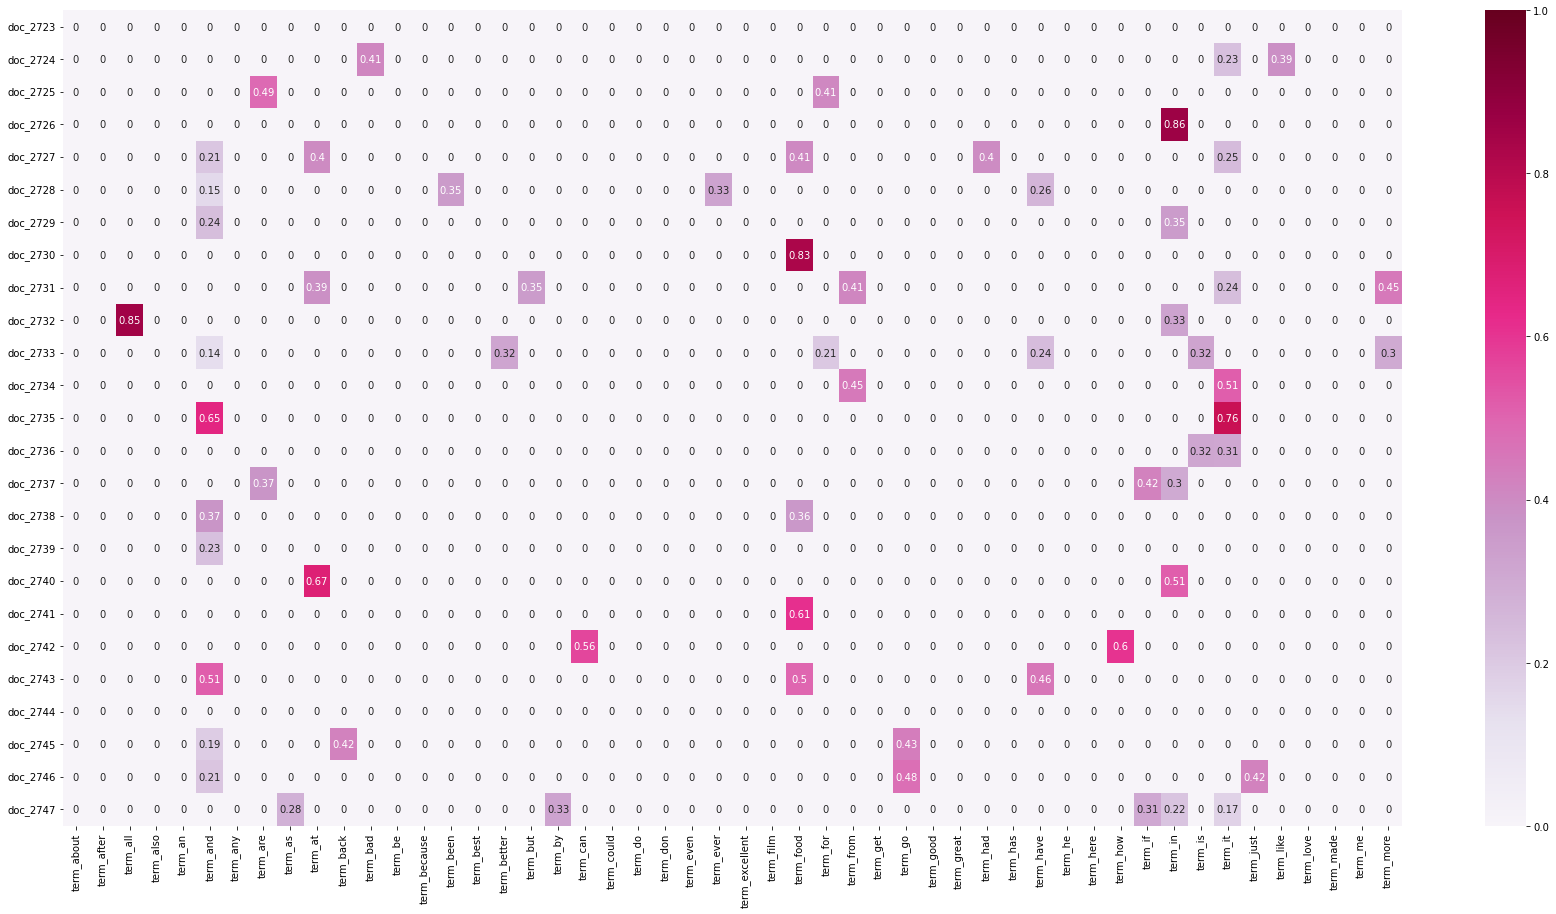

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=100)
X_tfidf = tfidf.fit_transform(X.sentence)

# define the xyz of the heat map
plot_x = ["term_"+str(i) for i in tfidf.get_feature_names()[0:50]]   
plot_y = ["doc_"+ str(i) for i in list(X.index)[-25:]]                          
plot_z = X_tfidf[-25:, 0:50].toarray()

# draw the heat map
df_heatmap = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(30, 15))
ax = sns.heatmap(df_heatmap, cmap="PuRd", vmin=0, vmax=1, annot=True)

## Naive Bayes Classfier

In [77]:
from sklearn.model_selection import train_test_split

# split train set and test set
x_train,x_test,y_train,y_test=train_test_split(X.sentence,X.score,test_size=0.3,random_state=18)

#### Generate by TFIDF

In [78]:
tfudf = TfidfVectorizer()
x_train_term = tfidf.fit_transform(x_train)
x_test_term = tfidf.fit_transform(x_test)

from sklearn.naive_bayes import MultinomialNB
clf_tfidf = MultinomialNB()
clf_tfidf.fit(x_train_term, y_train)
predict_x_test_term = clf_tfidf.predict(x_test_term)

# Sample query: lets's take a glance on actual and predicted score
final_df = pd.DataFrame({'sentence':list(x_test), 'score_actual': list(y_test), 'score_predicted': list(predict_x_test_term)})
final_df.iloc[::5][0:10]

,sentence,score_actual,score_predicted
0,We had so much to say about the place before w...,0.0,1.0
5,I won't try going back there even if it's empty.,0.0,0.0
10,The block was amazing.,1.0,1.0
15,He was very impressed when going from the orig...,1.0,0.0
20,All in all an excellent restaurant highlighted...,1.0,1.0
25,It presents a idyllic yet serious portrayal of...,1.0,1.0
30,Don't waste your time watching this rubbish no...,0.0,0.0
35,Was not happy.,0.0,0.0
40,Poor Reliability.,0.0,1.0
45,"Both films are terrible, but to the credit of ...",0.0,1.0


Accuracy score:  0.5901840490797546
Classification: 
              precision    recall  f1-score   support

         0.0       0.60      0.57      0.58       410
         1.0       0.58      0.61      0.60       405

    accuracy                           0.59       815
   macro avg       0.59      0.59      0.59       815
weighted avg       0.59      0.59      0.59       815

Confusion matrix: 


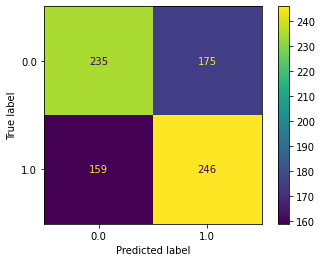

In [79]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix


print('Accuracy score: ', accuracy_score(y_test, predict_x_test_term))

print('Classification: ')
print(classification_report(y_test, predict_x_test_term))

plot_confusion_matrix(clf_tfidf, x_test_term, y_test)
print('Confusion matrix: ')
plt.show()

#### Generate by frequency feature

In [80]:
cv = CountVectorizer()
x_train_term = cv.fit_transform(x_train)
x_test_term = cv.transform(x_test)

# Prediction
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train_term, y_train)
predict_x_test_term = clf.predict(x_test_term)

# Sample query: lets's take a glance on actual and predicted score
check_df = pd.DataFrame({'sentence':list(x_test), 'score_actual': list(y_test), 'score_predicted': list(predict_x_test_term)})
check_df.iloc[::5][0:10]



,sentence,score_actual,score_predicted
0,We had so much to say about the place before w...,0.0,0.0
5,I won't try going back there even if it's empty.,0.0,0.0
10,The block was amazing.,1.0,1.0
15,He was very impressed when going from the orig...,1.0,0.0
20,All in all an excellent restaurant highlighted...,1.0,1.0
25,It presents a idyllic yet serious portrayal of...,1.0,1.0
30,Don't waste your time watching this rubbish no...,0.0,0.0
35,Was not happy.,0.0,1.0
40,Poor Reliability.,0.0,0.0
45,"Both films are terrible, but to the credit of ...",0.0,0.0


Accuracy score:  0.7950920245398773
Classification: 
              precision    recall  f1-score   support

         0.0       0.78      0.83      0.80       410
         1.0       0.82      0.76      0.79       405

    accuracy                           0.80       815
   macro avg       0.80      0.79      0.79       815
weighted avg       0.80      0.80      0.79       815

Confusion matrix: 


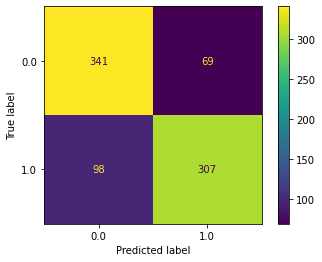

In [81]:
print('Accuracy score: ', accuracy_score(y_test, predict_x_test_term))

print('Classification: ')
print(classification_report(y_test, predict_x_test_term))

plot_confusion_matrix(clf, x_test_term, y_test)
print('Confusion matrix: ')
plt.show()

## Part 4

1. Plotting a sparse matrix makes the result hard to read, and waste computing resources.
2. There is a lot meaningless charcater in the dataset. Remove stop word may help.
3. Email data is inluded in the text data, however it is not a text data
3. Some module function in lab are depreciated in the new version of module. I think it is better to provide the module version from the begining.
